In [2]:
import sklearn as sk
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os
import tarfile
import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
def load_housing_data(HOUSING_PATH=HOUSING_PATH):
    csv_path = os.path.join(HOUSING_PATH, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing['ocean_proximity'].nunique()

5

In [10]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

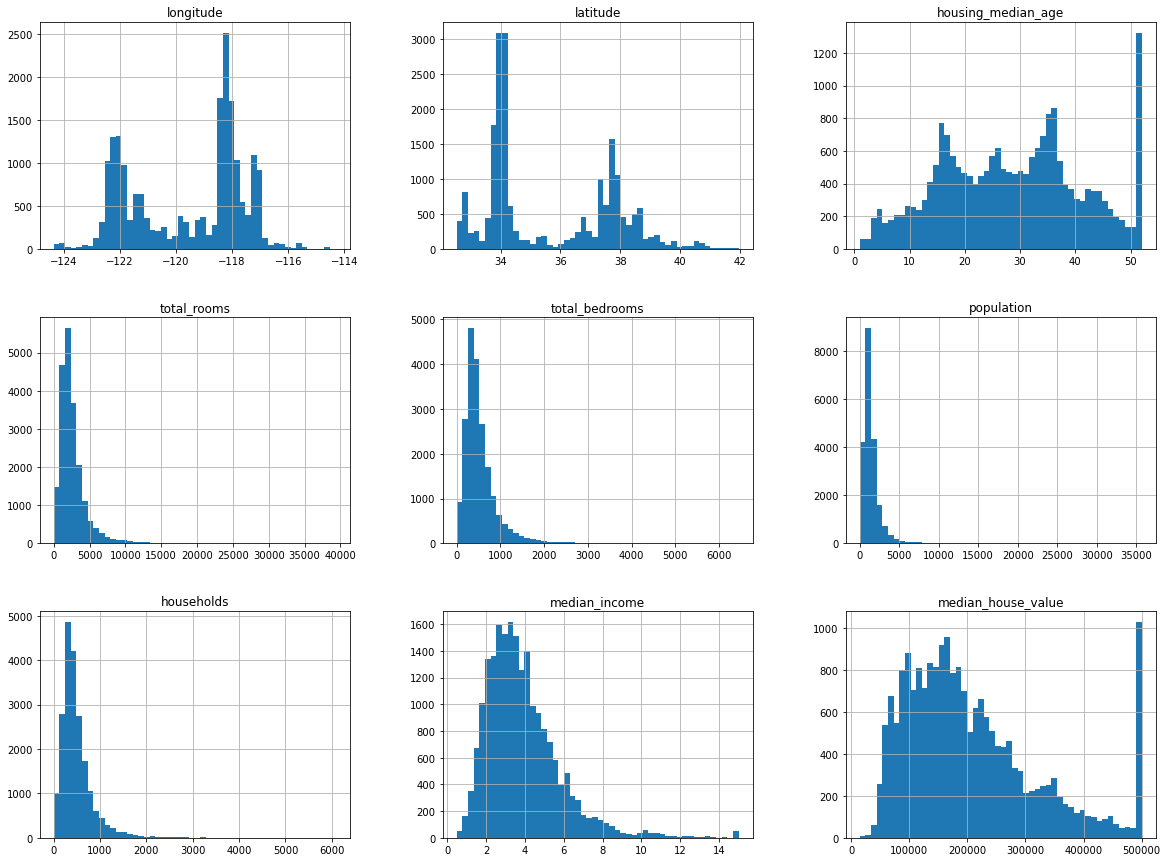

In [11]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1, 2, 3, 4, 5])

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [16]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [17]:
strat_train_set.drop(axis=1, columns='income_cat', inplace=True)
strat_test_set.drop(axis=1, columns='income_cat', inplace=True)

In [18]:
housing = strat_train_set.copy()

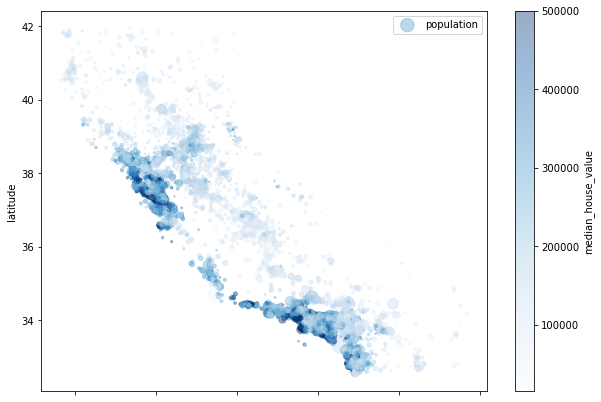

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("Blues"), colorbar=True,
)
plt.legend()

In [20]:
corr_matrix = housing.corr()

<AxesSubplot:>

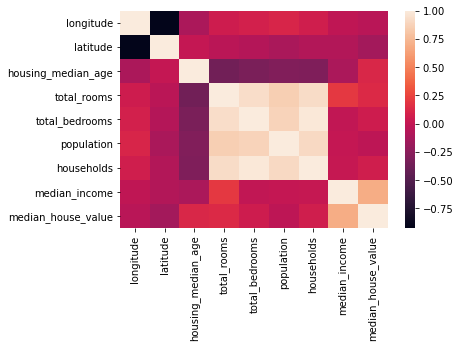

In [21]:
import seaborn as sns

sns.heatmap(corr_matrix)

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

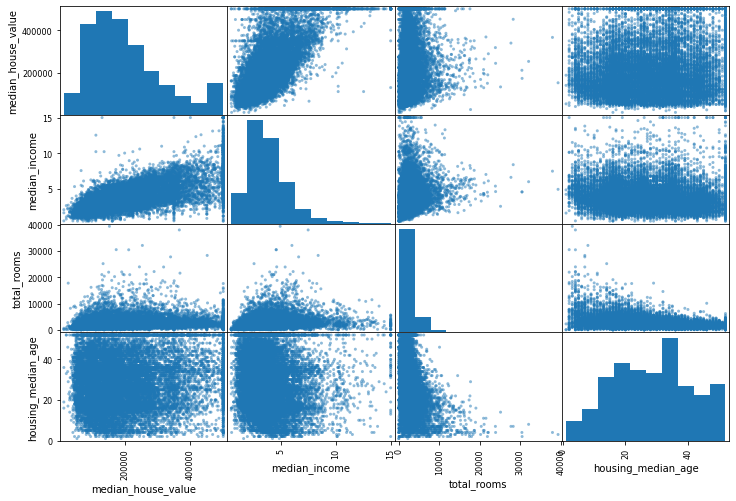

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

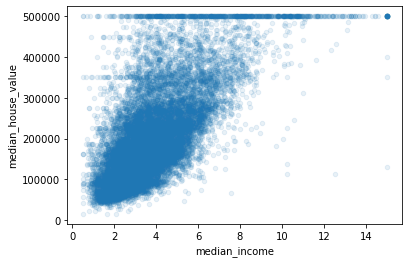

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [24]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [29]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [30]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
X = imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

In [35]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [36]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [37]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [43]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [46]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [48]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [49]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [68476.03927124 67337.07209714 71008.37156717 69649.63007882
 70680.98430026 75577.47968658 68835.53871794 70909.8375233
 76516.64712666 69423.58524429]
Mean: 70841.51856134052
Standard deviation: 2828.8940619729574


In [55]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347


In [56]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18759.57227080578

In [57]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49164.84647566 47373.13954556 49724.82998318 52316.8420244
 49757.21602034 53351.44616502 48740.4075231  48148.40705313
 52827.50194758 49938.75728921]
Mean: 50134.33940271742
Standard deviation: 1927.8357048526325


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [59]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63863.711002239404 {'max_features': 2, 'n_estimators': 3}
55701.1482085413 {'max_features': 2, 'n_estimators': 10}
52965.29749436277 {'max_features': 2, 'n_estimators': 30}
59819.43281953772 {'max_features': 4, 'n_estimators': 3}
52610.08103065784 {'max_features': 4, 'n_estimators': 10}
50082.34302875167 {'max_features': 4, 'n_estimators': 30}
58512.90028611571 {'max_features': 6, 'n_estimators': 3}
52059.58269796909 {'max_features': 6, 'n_estimators': 10}
50042.37033965584 {'max_features': 6, 'n_estimators': 30}
58533.99308118009 {'max_features': 8, 'n_estimators': 3}
52051.69025360406 {'max_features': 8, 'n_estimators': 10}
49902.35766619166 {'max_features': 8, 'n_estimators': 30}
62590.08813198155 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54319.550537182695 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59916.1729282816 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52744.79265544813 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.24574760e-02, 6.40203017e-02, 4.19216101e-02, 1.59748823e-02,
       1.49202512e-02, 1.40467520e-02, 1.32582724e-02, 3.40390617e-01,
       5.89361147e-02, 1.14914168e-01, 7.65026461e-02, 7.18456332e-03,
       1.57005288e-01, 8.02861638e-05, 2.93487817e-03, 5.45189263e-03])

In [64]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3403906174008904, 'median_income'),
 (0.15700528813150194, 'INLAND'),
 (0.11491416768320321, 'pop_per_hhold'),
 (0.0765026461158294, 'bedrooms_per_room'),
 (0.0724574760259436, 'longitude'),
 (0.06402030165563392, 'latitude'),
 (0.0589361146582118, 'rooms_per_hhold'),
 (0.04192161012769329, 'housing_median_age'),
 (0.01597488230274355, 'total_rooms'),
 (0.014920251199387159, 'total_bedrooms'),
 (0.014046751965391197, 'population'),
 (0.01325827244301859, 'households'),
 (0.0071845633205100835, '<1H OCEAN'),
 (0.005451892632658103, 'NEAR OCEAN'),
 (0.002934878173546226, 'NEAR BAY'),
 (8.028616383749779e-05, 'ISLAND')]

In [65]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [66]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47666.61059261462

In [67]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors)))

array([45674.0912759 , 49579.11775028])

In [68]:
from scipy.stats import randint
param_grid = {'n_estimators': randint(1, 200), 
              'max_features': randint(1, 8)}

forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = forest_reg, 
                                   n_iter=10,
                                   param_distributions = param_grid, cv = 5, 
                                   scoring='neg_mean_squared_error')
# Fit the random search model
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E337BB91F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E337BB7DC0>},
                   scoring='neg_mean_squared_error')

In [69]:
random_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=115)

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63863.711002239404 {'max_features': 2, 'n_estimators': 3}
55701.1482085413 {'max_features': 2, 'n_estimators': 10}
52965.29749436277 {'max_features': 2, 'n_estimators': 30}
59819.43281953772 {'max_features': 4, 'n_estimators': 3}
52610.08103065784 {'max_features': 4, 'n_estimators': 10}
50082.34302875167 {'max_features': 4, 'n_estimators': 30}
58512.90028611571 {'max_features': 6, 'n_estimators': 3}
52059.58269796909 {'max_features': 6, 'n_estimators': 10}
50042.37033965584 {'max_features': 6, 'n_estimators': 30}
58533.99308118009 {'max_features': 8, 'n_estimators': 3}
52051.69025360406 {'max_features': 8, 'n_estimators': 10}
49902.35766619166 {'max_features': 8, 'n_estimators': 30}
62590.08813198155 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54319.550537182695 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59916.1729282816 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52744.79265544813 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [71]:
final_model = random_search.best_estimator_
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47149.31861188258

In [72]:
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors)))

array([45146.59465999, 49070.37274911])

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(a, k):
    ind = np.argpartition(a, -k)[-k:]
    return np.sort(ind)

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self, X, y=None):
        self.feature_indices = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices]

In [74]:
feature_importances

array([7.24574760e-02, 6.40203017e-02, 4.19216101e-02, 1.59748823e-02,
       1.49202512e-02, 1.40467520e-02, 1.32582724e-02, 3.40390617e-01,
       5.89361147e-02, 1.14914168e-01, 7.65026461e-02, 7.18456332e-03,
       1.57005288e-01, 8.02861638e-05, 2.93487817e-03, 5.45189263e-03])

In [75]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [76]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [77]:
ppl = Pipeline([
    ('preparation', full_pipeline),
    ('TopFeatureSelector', TopFeatureSelector(feature_importances, k)),
])

In [78]:
housing_prepared_top_k_features = ppl.fit_transform(housing)

In [79]:
ppl = Pipeline([
    ('preparation', full_pipeline),
    ('TopFeatureSelector', TopFeatureSelector(feature_importances, k)),
    ('model', RandomForestRegressor(max_features=0.25, n_estimators=167))
])

In [80]:
ppl.fit(housing, housing_labels)


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [81]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]

print("Predictions:\t", ppl.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [267494.61077844 340419.16766467 203695.21556886  52237.1257485
 236844.31137725 132794.01197605 494087.11976048 171640.13173653
  98391.01796407 397341.43113772]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0, 127900.0, 500001.0, 140200.0, 95000.0, 500001.0]


In [82]:
from sklearn.svm import SVR

In [86]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_search_svr = GridSearchCV(estimator=svr, 
                                    param_grid=param_grid,
                                    scoring = 'accuracy',
                                    cv = 3)
svr_1=grid_search_svr.fit(housing_prepared, housing_labels)
print(grid_search_svr.best_params_ ) 
print('Best Score - SVR:', grid_search_svr.best_score_ )

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best Score - SVR: nan


In [102]:
best_param = {'C': 100, 'gamma': 1, 'kernel': 'rbf', 'degree':5}
model = SVR(**best_param)
model.fit(housing_prepared, housing_labels)
pred_labels = model.predict(housing_prepared)
final_mse = mean_squared_error(housing_labels, pred_labels)
final_rmse = np.sqrt(final_mse)
final_rmse

114998.48948921208

In [103]:
pred_labels

array([178094.43033204, 180747.17941741, 174830.12696619, ...,
       174296.40865838, 190085.91267382, 186400.6793913 ])

# -------------------------------------------------------

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [4]:
SC = StandardScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [5]:
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error

In [16]:
best_param = {'C': 10, 'gamma': 10, 'kernel': 'rbf', 'degree':3}
model = SVR(**best_param)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
final_mse = mean_squared_error(y_train, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.10706735493700295

In [22]:
model2 = LinearSVR(random_state=42)
model2.fit(X_train, y_train)
y_pred_2 = model2.predict(X_train)
final_mse = mean_squared_error(y_train, y_pred_2)
final_rmse = np.sqrt(final_mse)
final_rmse

0.9819256687727764

In [23]:
y_pred_2_final = model2.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_2_final)
final_rmse = np.sqrt(final_mse)
final_rmse

0.7623633525948943

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal, uniform

param_distribs =[
    {
        'kernel': ['rbf','poly'],
        "gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10),
        'degree': [2, 3, 4]
    },
    {
        'kernel': ['linear','sigmoid'],
        "gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)
    }
]
model = SVR()

rnd_srch = RandomizedSearchCV(estimator=model, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)

In [15]:
rnd_srch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=8.965429868602328, degree=4, gamma=0.029106359131330688, kernel=rbf; total time=  11.8s
[CV] END C=8.965429868602328, degree=4, gamma=0.029106359131330688, kernel=rbf; total time=  12.2s
[CV] END C=8.965429868602328, degree=4, gamma=0.029106359131330688, kernel=rbf; total time=  12.2s
[CV] END C=2.560186404424365, degree=4, gamma=0.0015847101210439089, kernel=rbf; total time=  11.7s
[CV] END C=2.560186404424365, degree=4, gamma=0.0015847101210439089, kernel=rbf; total time=  13.8s
[CV] END C=2.560186404424365, degree=4, gamma=0.0015847101210439089, kernel=rbf; total time=  11.8s
[CV] END C=4.337086111390218, gamma=0.0019307837536547132, kernel=linear; total time=  51.5s
[CV] END C=4.337086111390218, gamma=0.0019307837536547132, kernel=linear; total time=  36.5s
[CV] END C=4.337086111390218, gamma=0.0019307837536547132, kernel=linear; total time=  36.0s
[CV] END C=1.5641157902710026, gamma=0.027796975515266813, kern

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238BD395DF0>,
                                         'degree': [2, 3, 4],
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238C0068760>,
                                         'kernel': ['rbf', 'poly']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238C01D70A0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238C0076850>,
                                         'kernel': ['linear', 'sigmoid']}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [16]:
new_model = rnd_srch.best_estimator_

In [18]:
import numpy as np
new_model.fit(X_train, y_train)
final_mse = mean_squared_error(y_train, new_model.predict(X_train))
final_rmse = np.sqrt(final_mse)
final_rmse

0.6021846082695779

In [19]:
final_mse = mean_squared_error(y_test, new_model.predict(X_test))
final_rmse = np.sqrt(final_mse)
final_rmse

0.6310377971130803